## Implementation and analysis of clustering algorithms like K-Means
**Theory:**<br>
K-means is a popular clustering algorithm used in unsupervised machine learning. It is used to partition a dataset into K clusters based on the similarity of data points. The algorithm aims to group similar instances together and separate different instances into distinct clusters.

Here's a step-by-step explanation of how the K-means algorithm works:

1. Initialization: The algorithm begins by randomly selecting K initial cluster centroids from the dataset. These centroids represent the center points of the clusters.

2. Assignment: Each data point in the dataset is assigned to the cluster whose centroid is closest to it. The distance between a data point and a centroid is typically measured using Euclidean distance or another distance metric.

3. Update: After the initial assignment, the algorithm updates the positions of the cluster centroids. The new positions are calculated as the mean (centroid) of all the data points assigned to each cluster.

4. Iteration: Steps 2 and 3 are repeated iteratively until convergence is reached. Convergence occurs when the assignments no longer change significantly, or a maximum number of iterations is reached.

5. Final Clustering: Once convergence is achieved, the final clustering is obtained, where each data point belongs to a specific cluster based on its closest centroid.

The K in K-means refers to the predetermined number of clusters the algorithm should create. The choice of K is typically determined by the user or through techniques like the elbow method or silhouette score analysis.

K-means aims to minimize the within-cluster sum of squares (WCSS), also known as inertia. It seeks to create compact clusters by minimizing the distance between data points within the same cluster and maximizing the distance between different clusters.

K-means is widely used in various applications, including customer segmentation, image compression, anomaly detection, and recommendation systems. However, it is sensitive to the initial placement of centroids and can converge to suboptimal solutions in some cases. To mitigate this, techniques like multiple random initializations or K-means++ initialization can be used.

In summary, K-means is a clustering algorithm that groups data points into K clusters based on similarity. It iteratively assigns data points to clusters and updates the cluster centroids until convergence. The algorithm is used to discover patterns and structure in unlabeled data and has a wide range of applications in different domains.

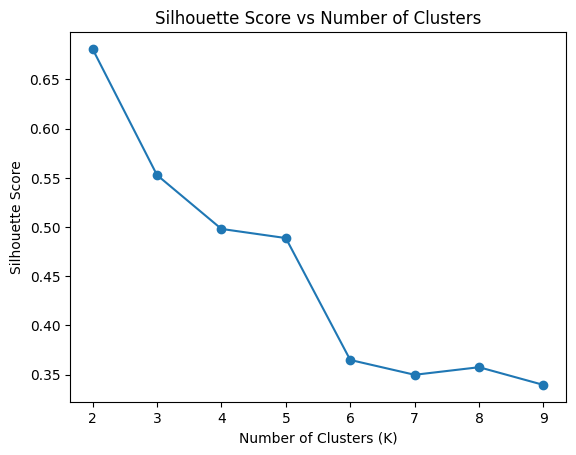

Best value of K: 2
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     Clu

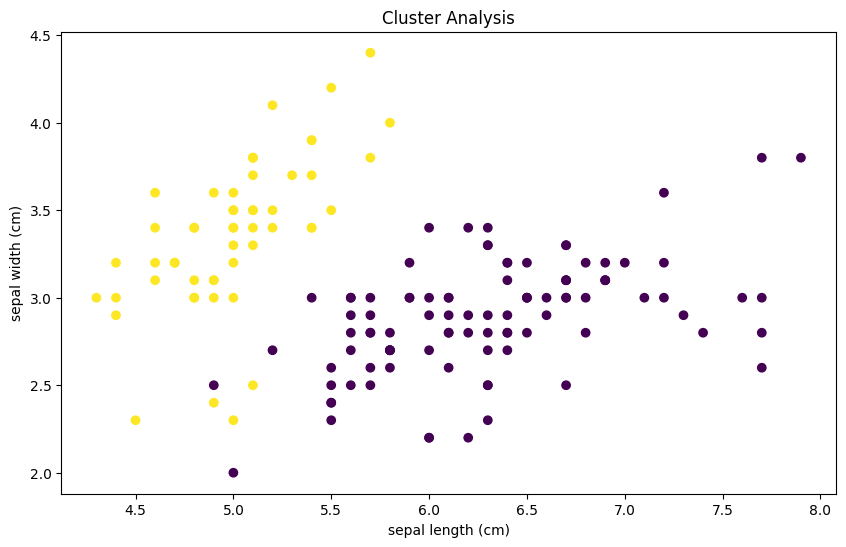

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
data = iris.data

# Prepare the data
X = data

# Perform K-Means clustering with different values of K
k_values = range(2, 10)
silhouette_scores = []

for k in k_values:
    # Create and fit the K-Means model
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Set n_init explicitly
    kmeans.fit(X)

    # Calculate the silhouette score
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.savefig('silhouette_scores.png')
plt.show()

# Choose the best value of K based on the highest silhouette score
best_k = k_values[np.argmax(silhouette_scores)]
print(f"Best value of K: {best_k}")

# Perform K-Means clustering with the best K
kmeans_best = KMeans(n_clusters=best_k, n_init=10, random_state=42)  # Set n_init explicitly
kmeans_best.fit(X)

# Get the cluster labels
cluster_labels = kmeans_best.labels_

# Analyze the clusters
cluster_analysis = pd.DataFrame(X, columns=iris.feature_names)
cluster_analysis['Cluster'] = cluster_labels
cluster_analysis['Target'] = iris.target

# Print the cluster analysis
print(cluster_analysis)

# Save the cluster analysis as an image
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Cluster Analysis')
plt.savefig('cluster_analysis.png')
plt.show()


### K-medoid
**Theory:**  
K-Medoid is a clustering algorithm that is similar to K-means but differs in the way it defines and updates the cluster centers. While K-means uses the mean (centroid) of the data points in a cluster as the center, K-Medoid uses the actual data points themselves as representatives or medoids.

Here's a step-by-step explanation of how the K-Medoid algorithm works:

1. Initialization: The algorithm starts by randomly selecting K data points from the dataset as the initial medoids.

2. Assignment: Each data point in the dataset is assigned to the nearest medoid based on a chosen distance metric (e.g., Euclidean distance). The medoid that minimizes the dissimilarity (distance) between a data point and itself is selected as the representative of that cluster.

3. Update: After the initial assignment, the algorithm tries to improve the clustering by iteratively updating the medoids. For each cluster, it selects a non-medoid data point and evaluates the total dissimilarity (sum of distances) between that data point and all other points in the same cluster. The data point that minimizes this total dissimilarity becomes the new medoid for the cluster.

4. Iteration: Steps 2 and 3 are repeated iteratively until convergence. Convergence occurs when the assignments no longer change significantly or when a maximum number of iterations is reached.

5. Final Clustering: Once convergence is achieved, the final clustering is obtained, where each data point is assigned to a specific cluster based on the nearest medoid.

K-Medoid, also known as Partitioning Around Medoids (PAM), is advantageous when dealing with data where the mean (centroid) may not be a representative point. For example, in cases where outliers or noise are present in the dataset, K-Medoid tends to be more robust than K-means.

However, compared to K-means, K-Medoid can be more computationally expensive because it requires calculating the dissimilarity between each data point and every medoid. Additionally, the algorithm's performance can be sensitive to the initial selection of medoids.

In summary, K-Medoid is a clustering algorithm that assigns data points to medoids and updates the medoids iteratively to optimize the clustering. It is particularly useful when dealing with data where the mean may not be an appropriate representation. K-Medoid has applications in areas such as gene expression analysis, image segmentation, and outlier detection.

In [5]:
!pip install scikit-learn-extra 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


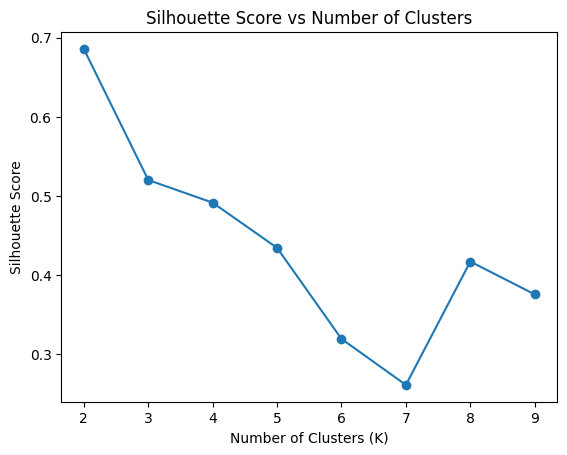

Best value of K: 2
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     Clu

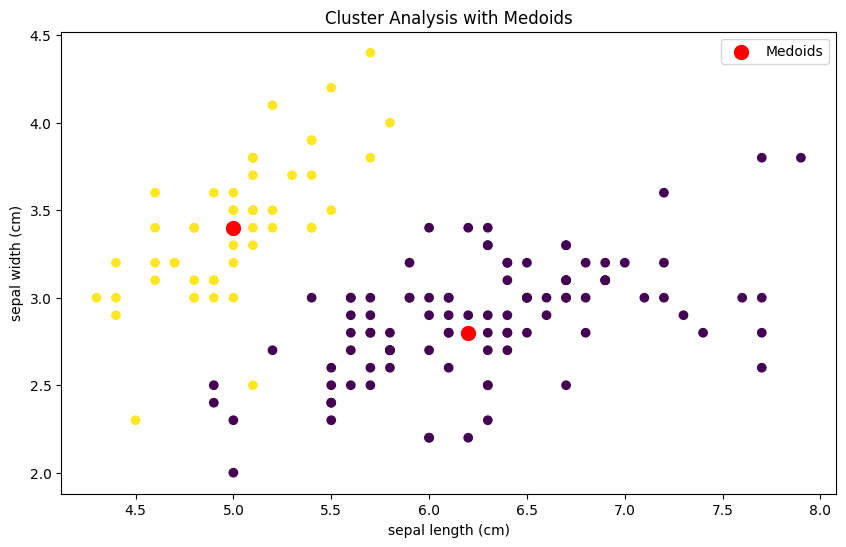

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
data = iris.data

# Prepare the data
X = data

# Perform K-Medoids clustering with different values of K
k_values = range(2, 10)
silhouette_scores = []

for k in k_values:
    # Create and fit the K-Medoids model
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    kmedoids.fit(X)

    # Calculate the silhouette score
    silhouette_scores.append(silhouette_score(X, kmedoids.labels_))

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

# Choose the best value of K based on the highest silhouette score
best_k = k_values[np.argmax(silhouette_scores)]
print(f"Best value of K: {best_k}")

# Perform K-Medoids clustering with the best K
kmedoids_best = KMedoids(n_clusters=best_k, random_state=42)
kmedoids_best.fit(X)

# Get the cluster labels and medoids
cluster_labels = kmedoids_best.labels_
medoids = kmedoids_best.cluster_centers_

# Analyze the clusters
cluster_analysis = pd.DataFrame(X, columns=iris.feature_names)
cluster_analysis['Cluster'] = cluster_labels
cluster_analysis['Target'] = iris.target

# Print the cluster analysis
print(cluster_analysis)

# Visualize the cluster medoids
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(medoids[:, 0], medoids[:, 1], c='red', marker='o', s=100, label='Medoids')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Cluster Analysis with Medoids')
plt.legend()
plt.show()
